# Set up imports

In [18]:
# setting up our imports
import re, string, unicodedata
import numpy as np
import pandas as pd
from pprint import pprint
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.models import LdaModel, LdaMulticore
import gensim.downloader as api
from gensim.models import LsiModel
from gensim.models import ldaseqmodel
from gensim.corpora import Dictionary, bleicorpus
from gensim.matutils import hellinger

nltk.download('wordnet')
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
#from bs4 import BeautifulSoup
#from nltk import word_tokenize, sent_tokenize

# Plotting tools 
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
# %matplotlib inline

# Enable logging for gensim - optional
#import logging
#logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
#logging.root.setLevel(level=logging.INFO)
#import warnings
#warnings.filterwarnings("ignore",category=DeprecationWarning)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kornelius\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Kornelius\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# load dataset

In [77]:
# Load dataset
# Load dataset
df = pd.read_excel('C:/Users/Kornelius/Desktop/Data 2/ecbpr/Warin_Sanger_ECB.xlsx') 
# Drop the columns not needed

C:\Users\Kornelius\Anaconda3\lib\site-packages\defusedxml\ElementTree.py:68: DeprecationWarning: The html argument of XMLParser() is deprecated
  _XMLParser.__init__(self, html, target, encoding)
C:\Users\Kornelius\Anaconda3\lib\site-packages\defusedxml\ElementTree.py:68: DeprecationWarning: The html argument of XMLParser() is deprecated
  _XMLParser.__init__(self, html, target, encoding)
C:\Users\Kornelius\Anaconda3\lib\site-packages\defusedxml\ElementTree.py:68: DeprecationWarning: The html argument of XMLParser() is deprecated
  _XMLParser.__init__(self, html, target, encoding)
C:\Users\Kornelius\Anaconda3\lib\site-packages\defusedxml\ElementTree.py:68: DeprecationWarning: The html argument of XMLParser() is deprecated
  _XMLParser.__init__(self, html, target, encoding)
C:\Users\Kornelius\Anaconda3\lib\site-packages\defusedxml\ElementTree.py:68: DeprecationWarning: The html argument of XMLParser() is deprecated
  _XMLParser.__init__(self, html, target, encoding)
C:\Users\Kornelius\A

In [78]:
df['word_count'] = df['Press'].apply(lambda x: len(str(x).split(" ")))
df[['Press','word_count']].head()
df.word_count.describe()

count     205.000000
mean     1438.653659
std       364.094649
min       261.000000
25%      1196.000000
50%      1370.000000
75%      1694.000000
max      3101.000000
Name: word_count, dtype: float64

In [79]:
# sort by year
df = df.sort_values(by=['Date'])
df

,Date,Press,qa,word_count
0,1998,"Ladies and gentlemen, in line with our stated ...",We have no indications based on the most recen...,3101
1,1998,"Ladies and gentlemen, as in previous months, t...",The answer to the first question is that it is...,2578
2,1998,"Ladies and gentlemen, the Vice-President and I...",We simply felt that the announcement of a rang...,2179
3,1998,"Ladies and gentlemen, the Vice-President and I...","No, that is not a signal that it is supposed t...",2697
14,1999,"Ladies and gentlemen, the Vice-President and I...","We did discuss this internally in the ECB, as ...",1527
13,1999,"Ladies and gentlemen,\nthe Vice-President and ...","Yes and no. No, I can't say that.\nWe don't pr...",1393
12,1999,"Ladies and gentlemen,\nthe Vice-President and ...","We are of the opinion, as we found today, that...",1460
11,1999,"Ladies and gentlemen, the Vice-President and I...",We will see if there is a specific demand for ...,1894
9,1999,"Ladies and gentlemen, the Vice-President and I...","Your first question was: ""do I regard it as po...",1071
10,1999,"Ladies and gentlemen, the Vice-President and I...",The last time I expressed myself publicly on t...,1832


In [71]:
df = df[ df['Date'] == 2016 ]

In [72]:
# sort by year
data = df['qa']

In [73]:
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string
stop = set(stopwords.words('english'))
exclude = set(string.punctuation) 
lemma = WordNetLemmatizer()
def clean(data):
    stop_free = " ".join([i for i in data.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

data = [clean(data).split()for data in data]  

In [74]:
# remove characters and numbers
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

In [75]:
from nltk.probability import FreqDist
result = str(data_words).strip('[]')
freq = pd.Series(''.join(result).split()).value_counts()
freq
# turn series into df
df = freq.to_frame().reset_index()
df.columns = ['words','counts']
df[df['words'].str.contains("fiscal")]

,words,counts
107,"'fiscal',",25


In [ ]:
# draw graph
ax = df.plot.bar(x='words', y='counts', rot=0, figsize=(50,30), width=1)


plt.xticks(size = 1)
plt.xticks(rotation=90)
plt.yticks(size = 40)

In [90]:
data = data_words
# Create Dictionary
id2word = corpora.Dictionary(data)
print((id2word))

Dictionary(5942 unique tokens: ['absenc', 'accept', 'achiev', 'activ', 'add']...)


In [91]:
# less than 10 documents,
id2word = corpora.Dictionary(data)
#id2word.filter_n_most_frequent(10)
#id2word.filter_extremes(no_above = 0.90)
#id2word.filter_extremes(no_above = 0.98)
#id2word.filter_extremes(no_above = 0.99)
#id2word.filter_extremes(no_below = 4)
#id2word.filter_extremes(no_below = 10)
#id2word.filter_extremes(no_below = 50)
print((id2word))

Dictionary(5942 unique tokens: ['absenc', 'accept', 'achiev', 'activ', 'add']...)


In [92]:
texts = data
# Term Document Frequency and creating corpus
corpus = [id2word.doc2bow(text) for text in texts]

In [93]:
import gensim.downloader as api
from gensim.models import TfidfModel
from gensim.corpora import Dictionary

vocab_tf={}
for i in corpus:
    for item,count in dict(i).items():
        if item in vocab_tf:
            vocab_tf[item]+=count
        else:
            vocab_tf[item] = count

In [94]:
dictList= []
for key, value in sorted(vocab_tf.items()):
    dictList.append([key, value])
dictList

[[0, 48],
 [1, 118],
 [2, 202],
 [3, 212],
 [4, 205],
 [5, 138],
 [6, 13],
 [7, 351],
 [8, 151],
 [9, 114],
 [10, 95],
 [11, 784],
 [12, 2053],
 [13, 17],
 [14, 118],
 [15, 413],
 [16, 542],
 [17, 35],
 [18, 235],
 [19, 629],
 [20, 10],
 [21, 258],
 [22, 18],
 [23, 643],
 [24, 208],
 [25, 1418],
 [26, 18],
 [27, 11],
 [28, 68],
 [29, 503],
 [30, 247],
 [31, 5],
 [32, 124],
 [33, 144],
 [34, 1915],
 [35, 243],
 [36, 166],
 [37, 368],
 [38, 302],
 [39, 61],
 [40, 65],
 [41, 118],
 [42, 67],
 [43, 491],
 [44, 21],
 [45, 304],
 [46, 533],
 [47, 122],
 [48, 6],
 [49, 805],
 [50, 279],
 [51, 740],
 [52, 812],
 [53, 2],
 [54, 15],
 [55, 239],
 [56, 706],
 [57, 300],
 [58, 8],
 [59, 677],
 [60, 550],
 [61, 240],
 [62, 134],
 [63, 33],
 [64, 546],
 [65, 5],
 [66, 87],
 [67, 392],
 [68, 674],
 [69, 10],
 [70, 83],
 [71, 725],
 [72, 72],
 [73, 66],
 [74, 86],
 [75, 32],
 [76, 220],
 [77, 713],
 [78, 1427],
 [79, 1261],
 [80, 922],
 [81, 500],
 [82, 191],
 [83, 21],
 [84, 304],
 [85, 35],
 [86, 25

In [96]:
df = pd.DataFrame(dictList) 
df = df.sort_values(ascending = False, by = 1)
df.columns = ['words','counts']
df
Total = df['counts'].sum()
Total


285743

(0.0, 3000)

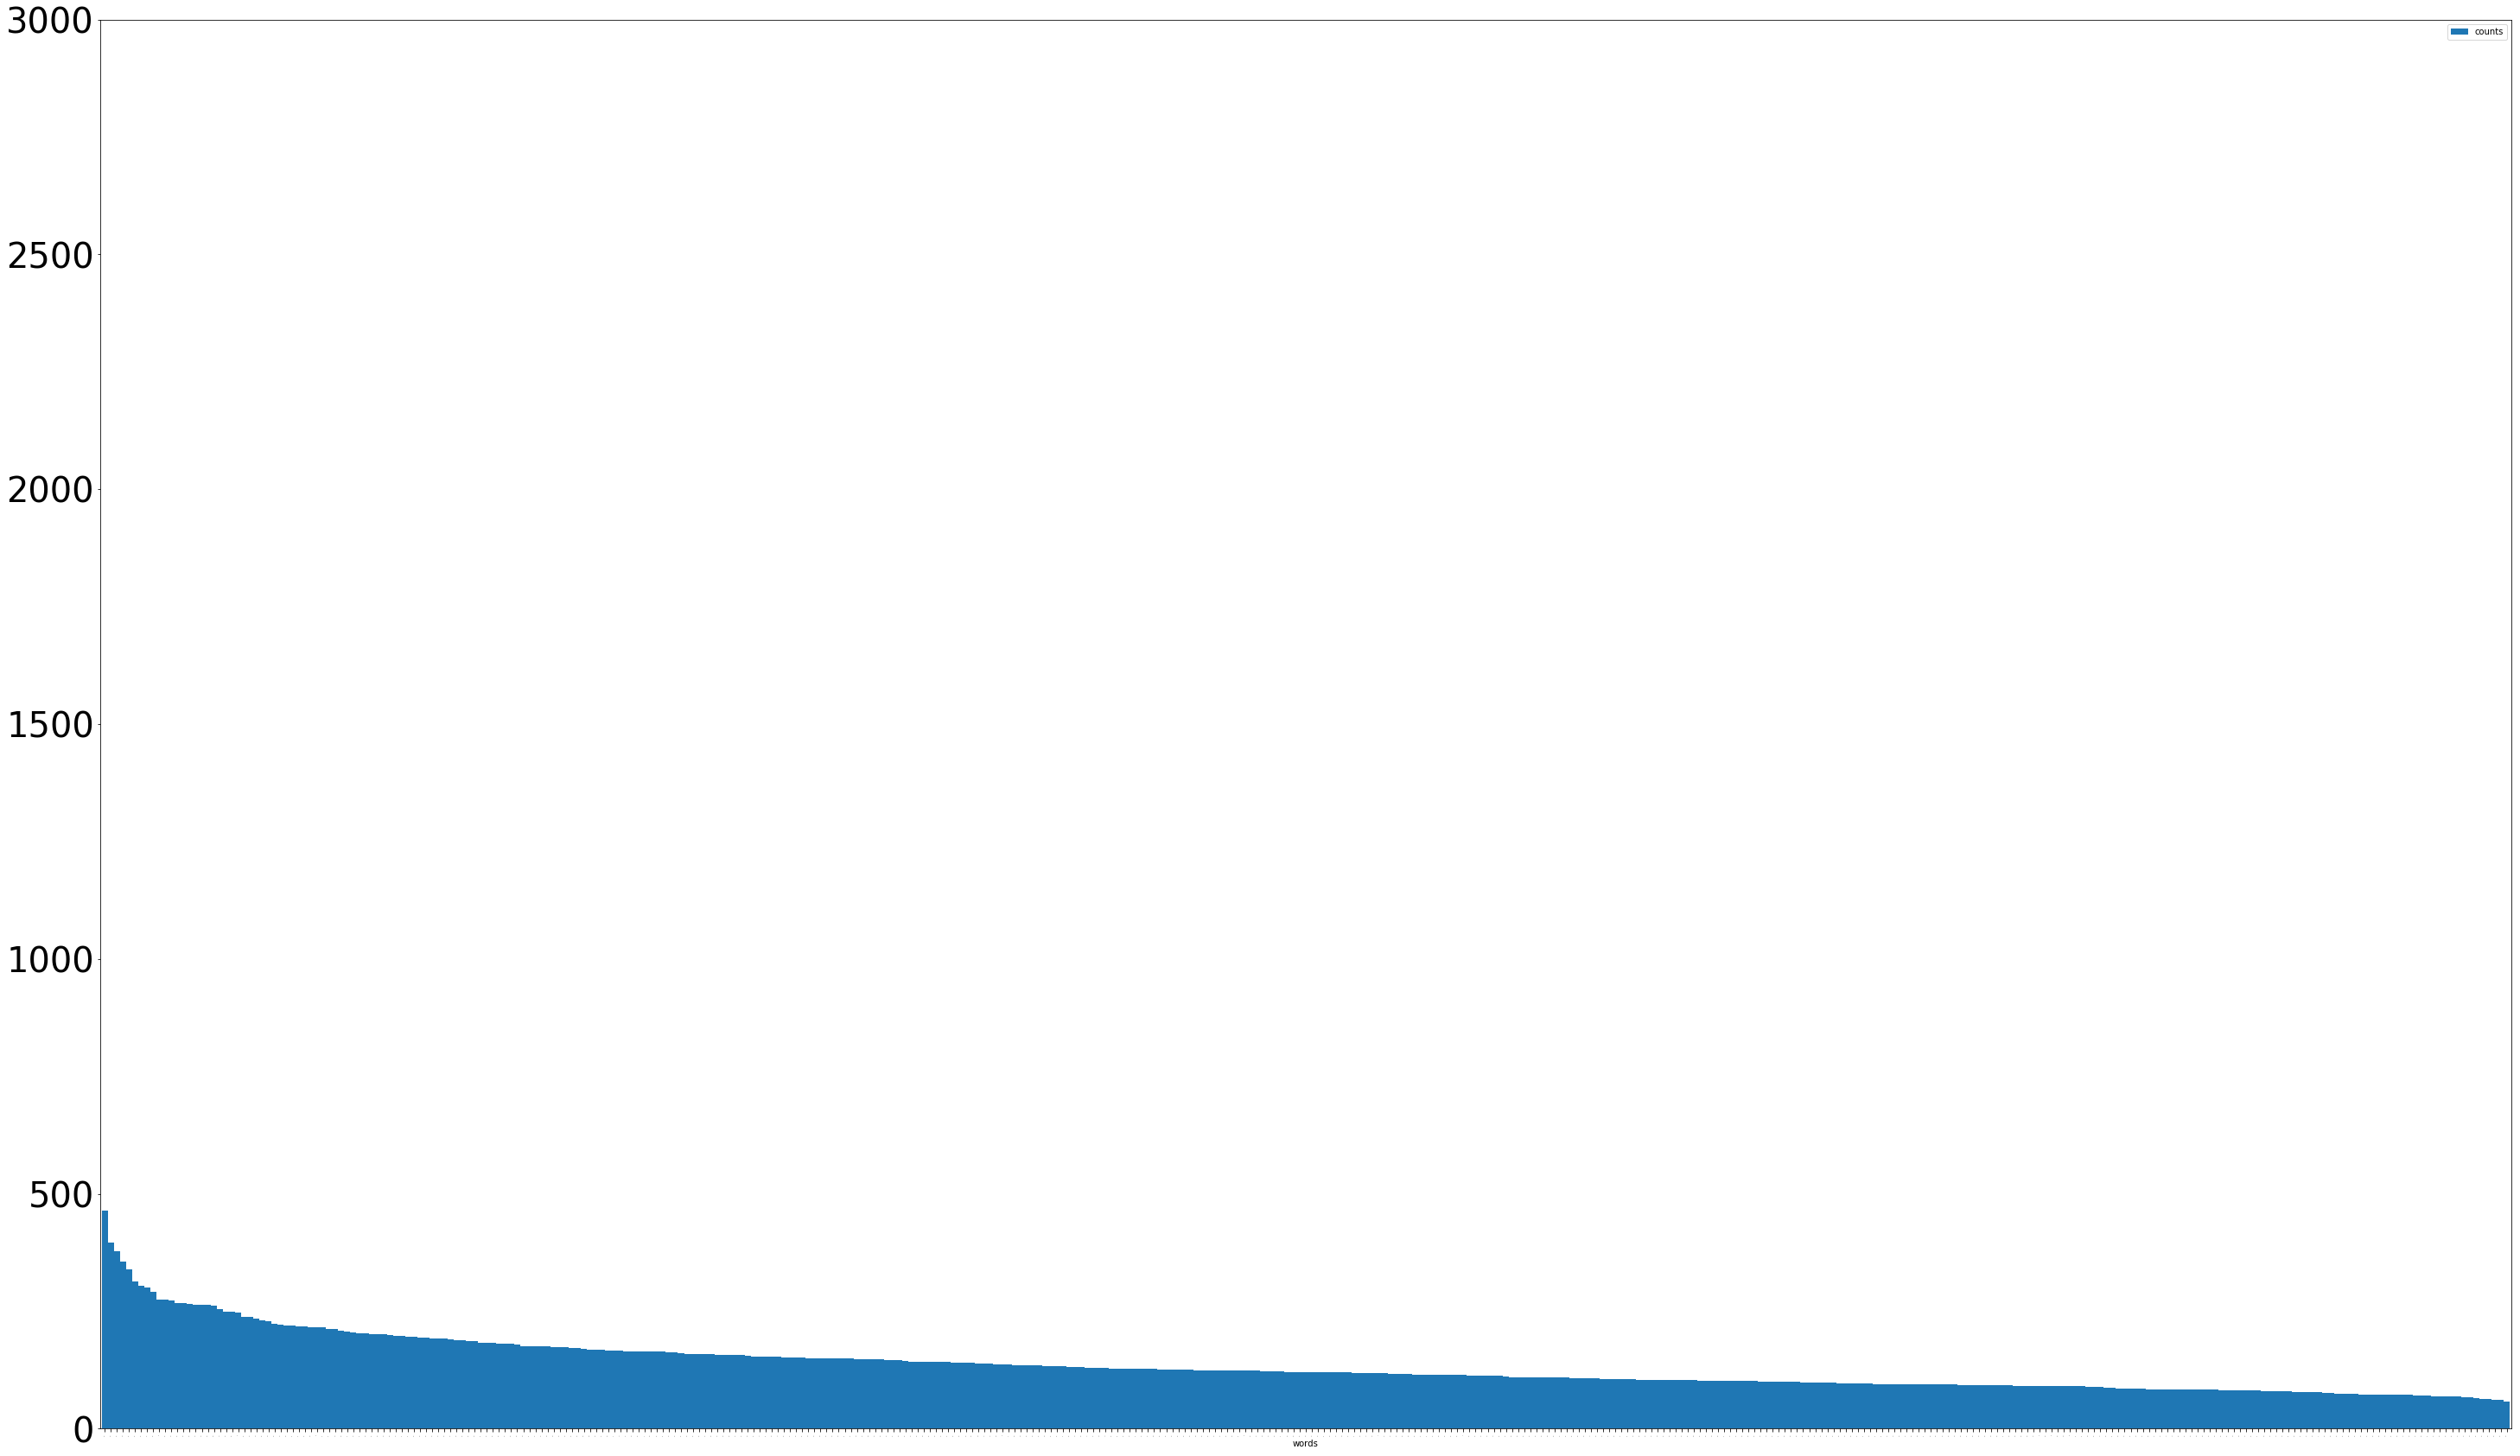

In [76]:
ax = df.plot.bar(x='words', y='counts', rot=0, figsize=(50,30), width=1)


plt.xticks(size = 1)
plt.xticks(rotation=90)
plt.yticks(size = 40)
plt.ylim(top = 3000)

In [16]:
#plt.bar(*zip(*vocab_tf.items()))
#plt.show()